In [261]:
import pandas as pd
import numpy as np
import seaborn as sns

In [262]:
df = pd.read_csv('DataSet/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [263]:
y, class_names = pd.factorize(df.Species, sort=True)

class_names

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [264]:
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

<h3>Keras : to_categorical<h3>

In [265]:
from tensorflow.keras.utils import to_categorical

to_categorical(1, 3).astype(int)

array([0, 1, 0])

In [266]:
cattegories, ids = np.unique(df.Species, return_inverse=True)

In [267]:
cattegories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [268]:
ids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [269]:
def one_hot_key(arr):
    cattegories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(cattegories))

y_1h = one_hot_key(df.Species).astype(int)

y_1h[47:52]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [270]:
df.iloc[98].Species

'Iris-versicolor'

<h3>Pandas : get_dummies</h3>

In [271]:
y[:5]

array([0, 0, 0, 0, 0])

In [272]:
y_1hgd = pd.get_dummies(y)

In [273]:
y_1hgd[130:135]

,0,1,2
130,False,False,True
131,False,False,True
132,False,False,True
133,False,False,True
134,False,False,True


<h3>SKlearn : OneHotEncoder</h3>

In [274]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y2 = df.Species.to_numpy()
y2 = y2.reshape(-1, 1)

y2[:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [275]:
y_1hsk = enc.fit_transform(y2).toarray().astype(int)

In [276]:
y_1hsk[14]

array([1, 0, 0])

In [277]:
x = df.drop(['Id', 'Species'], axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h3>Feature Scaling</h3>

In [278]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_sc = sc.fit_transform(x)
x_sc[:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

<h3>Train-Test Split</h3>

In [279]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=20)

len(x_train), len(x_test)

(112, 38)

In [280]:
def one_hot_key(arr):
    cattegories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(cattegories))

y_train_1h = one_hot_key(y_train).astype(int)

y_test_1h = one_hot_key(y_test).astype(int)

<h3>Model</h3>

In [281]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

hidden_node = 128
model.add(Dense(hidden_node, activation='relu', input_shape=(4,)))

model.add(Dense(3, activation='softmax'))

In [282]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               640       
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [283]:
model.output_shape

(None, 3)

<h3>Complie & Train</h3>

In [284]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [285]:
import time

start = time.time()

history = model.fit(x_train, y_train_1h, epochs=80, verbose=1, batch_size=64, validation_split=0.25)

end = time.time()

print(f'time taken {end-start:.3f} sce')

Epoch 1/80
2/2 [==============================] - 0s 63ms/step - loss: 1.1240 - accuracy: 0.3690 - val_loss: 1.1078 - val_accuracy: 0.3929
Epoch 2/80
2/2 [==============================] - 0s 12ms/step - loss: 1.0767 - accuracy: 0.4881 - val_loss: 1.0459 - val_accuracy: 0.3571
Epoch 3/80
2/2 [==============================] - 0s 12ms/step - loss: 1.0282 - accuracy: 0.4881 - val_loss: 0.9879 - val_accuracy: 0.3929
Epoch 4/80
2/2 [==============================] - 0s 12ms/step - loss: 0.9840 - accuracy: 0.6071 - val_loss: 0.9329 - val_accuracy: 0.7500
Epoch 5/80
2/2 [==============================] - 0s 12ms/step - loss: 0.9429 - accuracy: 0.8214 - val_loss: 0.8808 - val_accuracy: 0.7857
Epoch 6/80
2/2 [==============================] - 0s 12ms/step - loss: 0.9034 - accuracy: 0.8214 - val_loss: 0.8324 - val_accuracy: 0.7857
Epoch 7/80
2/2 [==============================] - 0s 12ms/step - loss: 0.8645 - accuracy: 0.8333 - val_loss: 0.7879 - val_accuracy: 0.7857
Epoch 8/80
2/2 [===========

<h3>Evaluate</h3>

In [286]:
score = model.evaluate(x_test, y_test_1h, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.3368341624736786
Test accuracy : 0.8684


In [287]:
model.metrics_names

['loss', 'accuracy']

In [288]:
y_pred = model.predict(x_test)

y_pred[:4]
y_pred[:4].round(3)

2/2 [==============================] - 0s 1ms/step


array([[0.988, 0.01 , 0.002],
       [0.03 , 0.738, 0.232],
       [0.038, 0.637, 0.324],
       [0.005, 0.257, 0.738]], dtype=float32)

In [289]:
y_pred_cat = np.argmax(y_pred, axis=1)

y_pred_cat[:4]

array([0, 1, 1, 2])

In [290]:
_, y_test_enc = np.unique(y_test, return_inverse=True)

y_test_enc[:4]

array([0, 1, 1, 2])

In [291]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test_enc, y_pred_cat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.86      0.83        14
 Iris-virginica       0.82      0.75      0.78        12

       accuracy                           0.87        38
      macro avg       0.87      0.87      0.87        38
   weighted avg       0.87      0.87      0.87        38

[[12  0  0]
 [ 0 12  2]
 [ 0  3  9]]


Text(0.5, 1.0, 'Confusion Matrix')

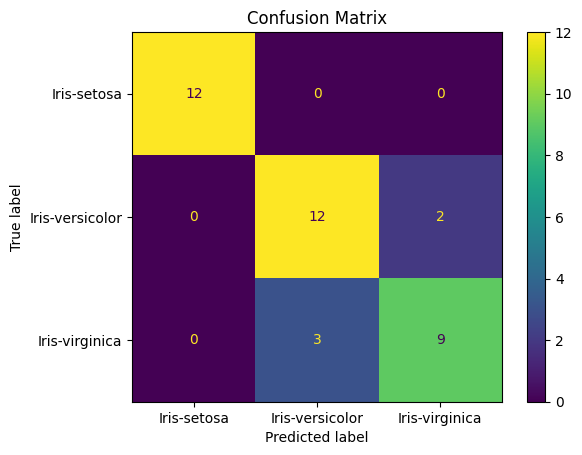

In [292]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cat)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Accuracy Cruve')

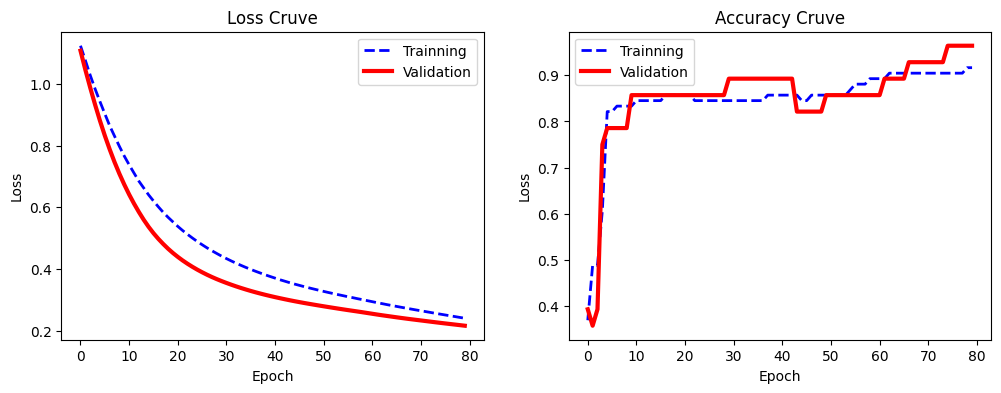

In [293]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

<h3>Predict</h3>

In [294]:
x_new = [[8.1, 4.0, 5.9, 2.1],
         [6.8, 4.0, 3.5, 1.4]]

x_new_sc = sc.fit_transform(x_new)
x_new_sc

array([[ 1.,  0.,  1.,  1.],
       [-1.,  0., -1., -1.]])

In [295]:
y_pred_pr = model.predict(x_new_sc)
y_pred_pr.round(3)

1/1 [==============================] - 0s 13ms/step


array([[0.006, 0.147, 0.847],
       [0.933, 0.057, 0.01 ]], dtype=float32)

In [296]:
y_pred = np.argmax(y_pred_pr, axis=1)
y_pred

array([2, 0])

<h3>Decision Regions</h3>

In [297]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 3s 294us/step


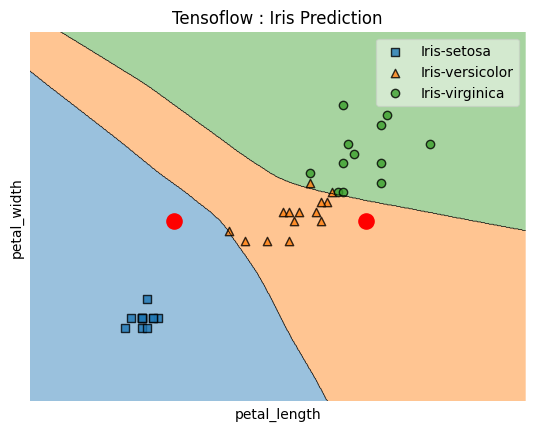

In [298]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(x_test, np.array(y_test_enc), 
                           clf=model_no_ohe, feature_index=[2, 3],
                           filler_feature_values={0: value, 1: value},
                           filler_feature_ranges={0: width, 1: width}, 
                           legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensoflow : Iris Prediction")
plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(x_new_sc[:,0], x_new_sc[:,1], marker='o', s=120, c='r')